In [9]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [10]:
weather_dataset = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)

# Reorder dataset
weather_dataset = weather_dataset[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'heatIndexC', 'dewPointC', 'windChillC', 'windGustKmph', 'feelsLikeC']]
weather_dataset

,precipMM,tempC,windspeedKmph,cond,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustKmph,feelsLikeC
2015-01-01,0.020649,0.232552,0.350260,0.565789,0.810009,0.968750,0.775503,0.333906,0.268139,0.569311,0.236719,0.285807,0.268139
2015-01-02,0.000000,0.231250,0.441406,0.585526,0.765097,1.000000,0.848240,0.308802,0.247126,0.504407,0.231250,0.334925,0.247126
2015-01-03,0.001106,0.241667,0.305398,0.631579,0.808877,1.000000,0.826509,0.484427,0.278736,0.570513,0.241667,0.227720,0.278736
2015-01-04,0.000369,0.278385,0.205374,0.580044,0.838240,1.000000,0.762392,0.418542,0.331897,0.612179,0.278385,0.173394,0.327586
2015-01-05,0.001106,0.323698,0.177083,0.399123,0.842995,0.848307,0.742816,0.361146,0.390805,0.685897,0.323698,0.150246,0.390805
2015-01-06,0.001106,0.357813,0.160393,0.399123,0.806914,0.771484,0.739943,0.280833,0.414511,0.662260,0.357813,0.136212,0.414511
2015-01-07,0.001659,0.270573,0.180279,0.414474,0.822992,0.869792,0.759698,0.317708,0.322557,0.612179,0.270573,0.144893,0.322557
2015-01-08,0.000000,0.222917,0.320786,0.645833,0.738074,1.000000,0.832435,0.260417,0.243714,0.450721,0.222917,0.264395,0.243714
2015-01-09,0.004978,0.185417,0.312263,0.559211,0.800121,0.921875,0.860632,0.545833,0.216415,0.483974,0.185417,0.245732,0.216415
2015-01-10,0.000369,0.183854,0.310133,0.655702,0.721014,1.000000,0.844828,0.332656,0.202586,0.380208,0.183854,0.256510,0.183728


# Correlate

In [11]:
new_dataset = weather_dataset.copy()
for i in range(1, 6):
    new_dataset.precipMM = new_dataset.precipMM.shift(-1)
    new_dataset = new_dataset[:(len(new_dataset)-1)]
    corr = new_dataset.corr(method='spearman')
    corr.to_csv('wwo_correlated_manila/corr_weather_1day_lag' + str(i) + '.csv')

In [14]:
# Correlate
corr = weather_dataset.corr(method='spearman')

# rename columns
cols = string.ascii_uppercase
cols = cols[:len(corr)]
cols = list(cols)
corr.columns = cols
corr = np.round(corr, decimals=4)
corr

,A,B,C,D,E,F,G,H,I,J,K,L,M
precipMM,1.0000,0.1369,-0.3038,0.4832,0.4759,-0.8914,-0.5811,0.5902,0.3892,0.7102,0.1371,-0.2187,0.3891
tempC,0.1369,1.0000,-0.6590,0.3685,-0.5197,-0.0911,-0.4453,-0.2482,0.9288,0.4085,1.0000,-0.6983,0.9288
windspeedKmph,-0.3038,-0.6590,1.0000,-0.4675,0.0971,0.2717,0.3069,-0.0125,-0.7104,-0.4661,-0.6589,0.9837,-0.7099
cond,0.4832,0.3685,-0.4675,1.0000,0.0804,-0.4644,-0.4210,0.2610,0.4657,0.4315,0.3684,-0.4311,0.4654
humidity,0.4759,-0.5197,0.0971,0.0804,1.0000,-0.5092,-0.2053,0.5299,-0.2176,0.5026,-0.5195,0.1799,-0.2177
visibility,-0.8914,-0.0911,0.2717,-0.4644,-0.5092,1.0000,0.5685,-0.5499,-0.3358,-0.6846,-0.0914,0.1864,-0.3355
pressure,-0.5811,-0.4453,0.3069,-0.4210,-0.2053,0.5685,1.0000,-0.3667,-0.6127,-0.7257,-0.4457,0.2738,-0.6126
cloudcover,0.5902,-0.2482,-0.0125,0.2610,0.5299,-0.5499,-0.3667,1.0000,-0.0478,0.3460,-0.2480,0.0859,-0.0481
heatIndexC,0.3892,0.9288,-0.7104,0.4657,-0.2176,-0.3358,-0.6127,-0.0478,1.0000,0.6935,0.9289,-0.7177,1.0000
dewPointC,0.7102,0.4085,-0.4661,0.4315,0.5026,-0.6846,-0.7257,0.3460,0.6935,1.0000,0.4088,-0.4147,0.6934


In [15]:
corr.to_csv('wwo_correlated_manila\corr_weather_1day.csv')

## Graph Correlation

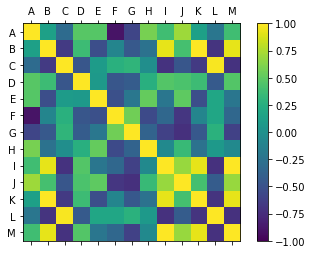

In [16]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.savefig('corr_weather_1day_matrix.png')
plt.show()

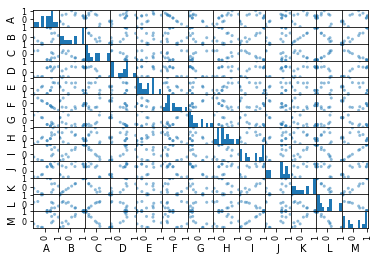

In [17]:
plt.figure(figsize=(500,300))
scatter_matrix(corr)
plt.savefig('corr_weather_1day_scatterplot.png')
plt.show()